In [24]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from statapp.common.utils import array_to_multi_indexed_series, survival_function
from statapp.common.preprocessing import load_data
from statapp.attention_analysis.data_acquisition import *
from statapp.attention_analysis.entropy import *
from statapp.attention_analysis.plotting import *
data_path = "../data/attention_data/"

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tnrange, tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
data_file_names = {
    "en_ewt" : "English",
    "fr_gsd" : "French",
    "de_gsd" : "German",
    "tr_imst" : "Turkish",
    "ru_gsd" : "Russian",
    "ar_padt" : "Arabic",
    "ug_udt" : "Uyghur",
    "mt_mudt" : "Maltese",
    "id_gsd" : "Indonesian",
    "zh_gsd" : "Chinese"
                  }

# XLM-Roberta

In [46]:
tokenizer, model = get_tokenizer_and_model("xlm-roberta-base")

KeyboardInterrupt: 

Token indices sequence length is longer than the specified maximum sequence length for this model (31698 > 512). Running this sequence through the model will result in indexing errors


For English language :


Token indices sequence length is longer than the specified maximum sequence length for this model (12922 > 512). Running this sequence through the model will result in indexing errors


For French language :


Token indices sequence length is longer than the specified maximum sequence length for this model (22667 > 512). Running this sequence through the model will result in indexing errors


For German language :


Token indices sequence length is longer than the specified maximum sequence length for this model (15790 > 512). Running this sequence through the model will result in indexing errors


For Turkish language :


Token indices sequence length is longer than the specified maximum sequence length for this model (18448 > 512). Running this sequence through the model will result in indexing errors


For Russian language :


Token indices sequence length is longer than the specified maximum sequence length for this model (36975 > 512). Running this sequence through the model will result in indexing errors


For Arabic language :


Token indices sequence length is longer than the specified maximum sequence length for this model (21725 > 512). Running this sequence through the model will result in indexing errors


For Uyghur language :


Token indices sequence length is longer than the specified maximum sequence length for this model (24677 > 512). Running this sequence through the model will result in indexing errors


For Maltese language :


Token indices sequence length is longer than the specified maximum sequence length for this model (15086 > 512). Running this sequence through the model will result in indexing errors


For Indonesian language :


Token indices sequence length is longer than the specified maximum sequence length for this model (14345 > 512). Running this sequence through the model will result in indexing errors


For Chinese language :


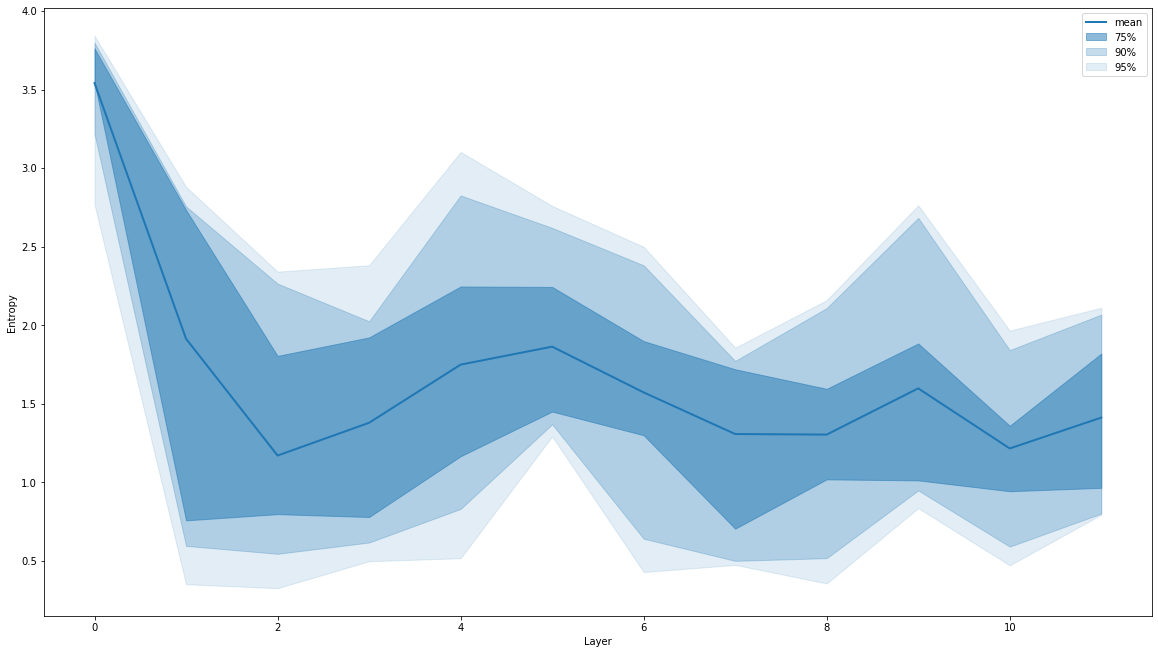

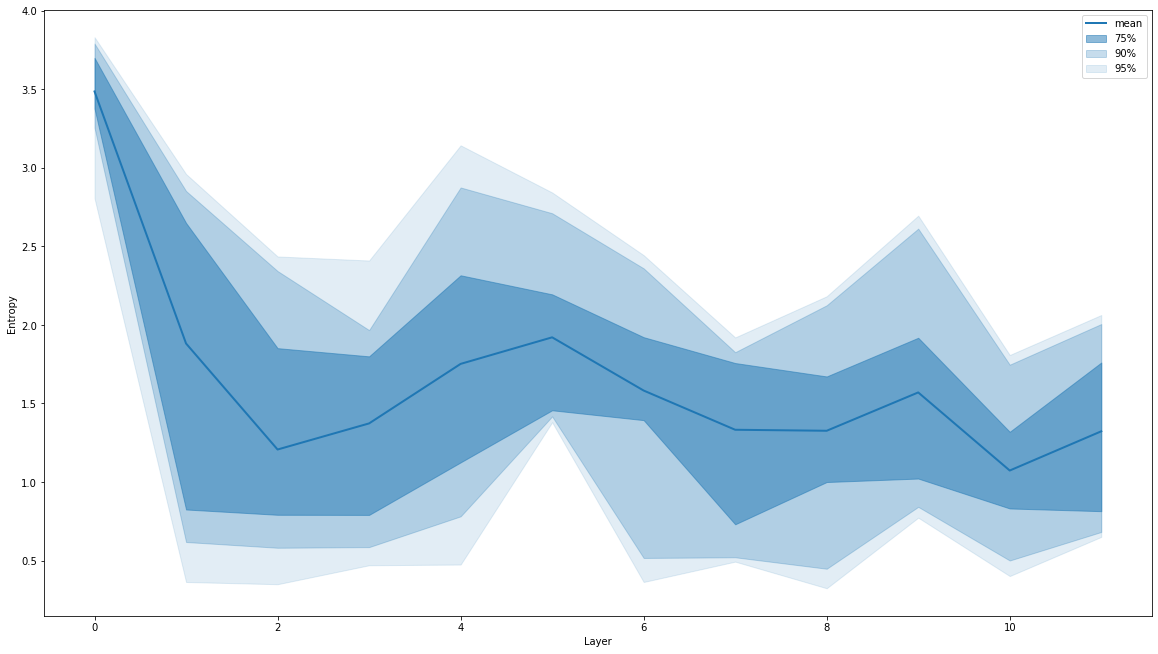

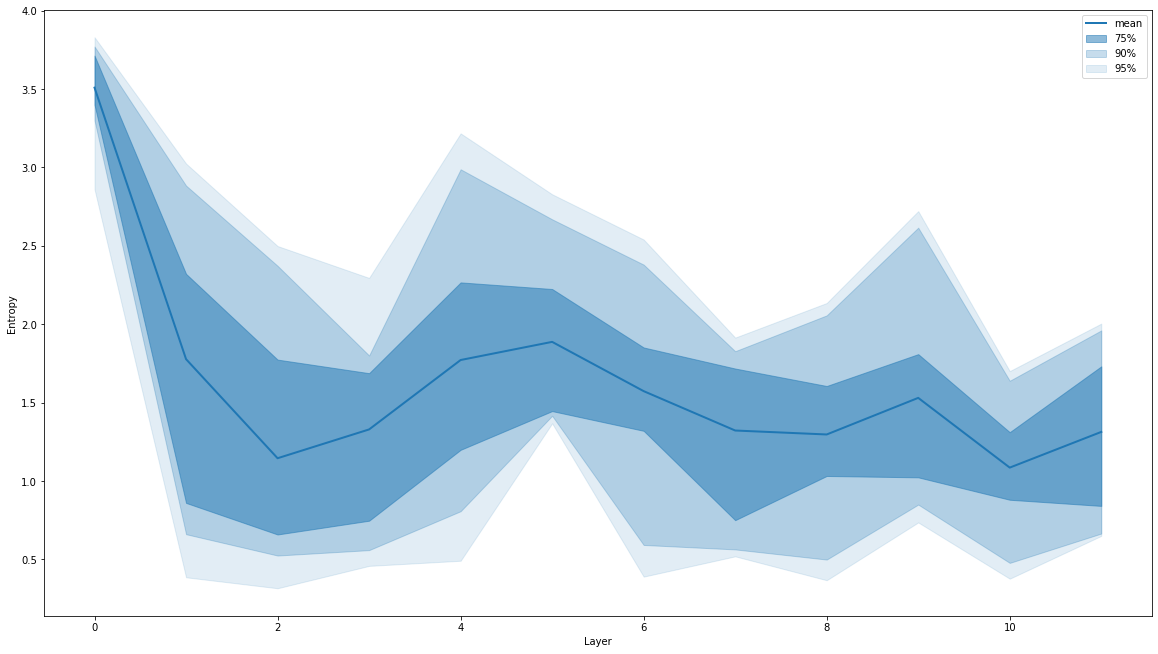

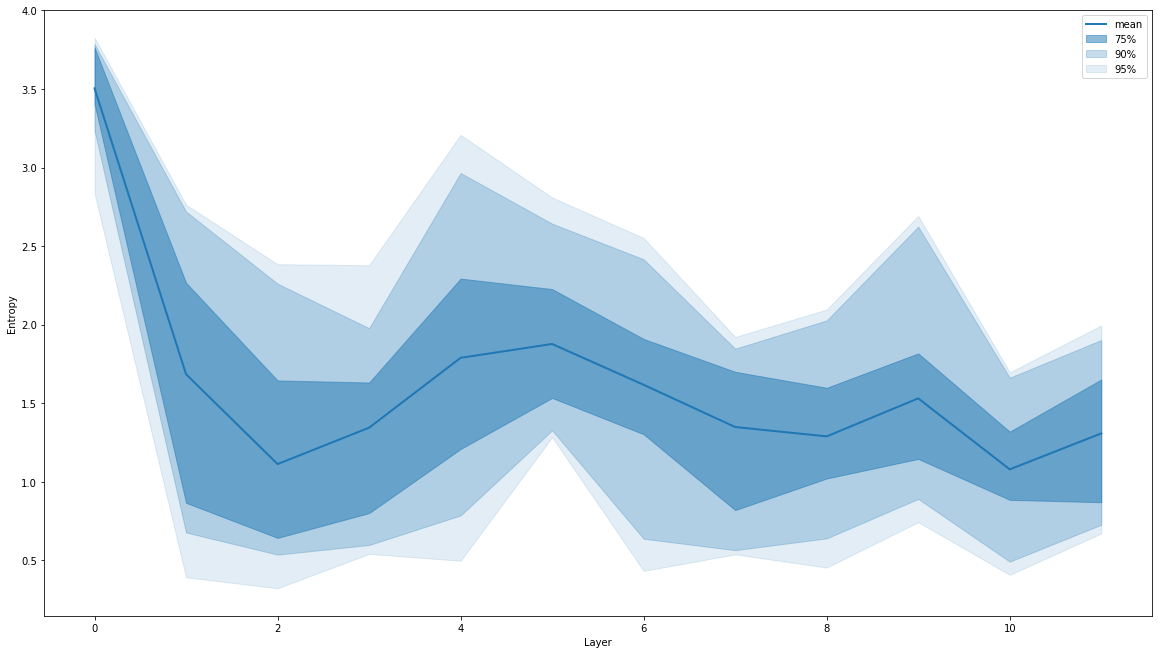

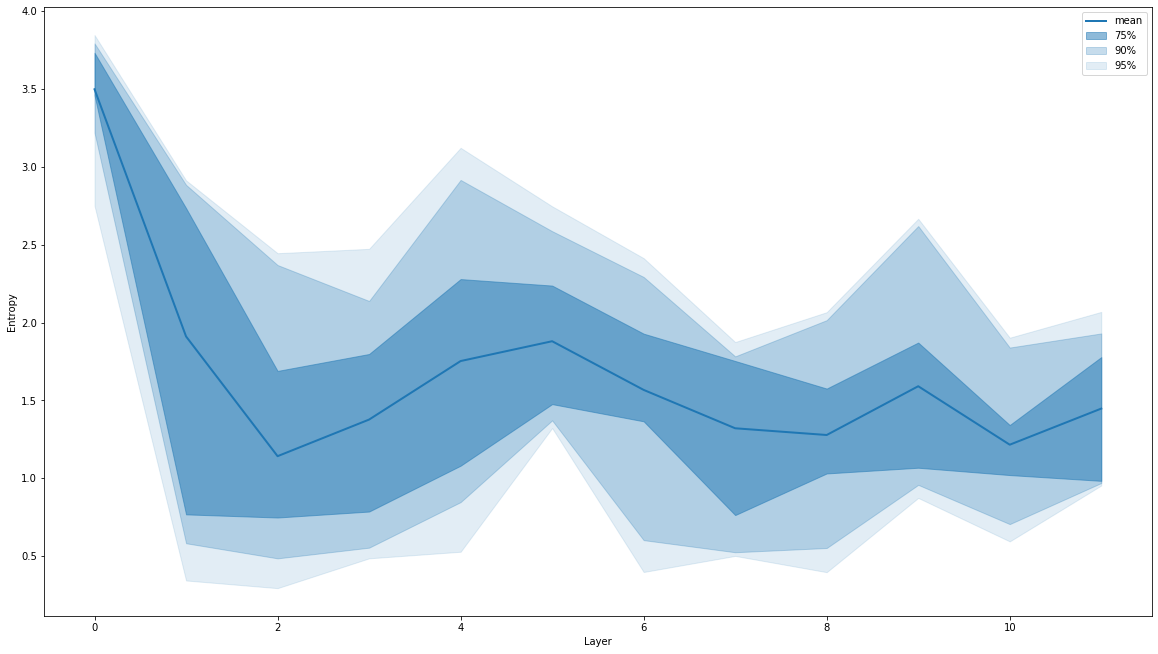

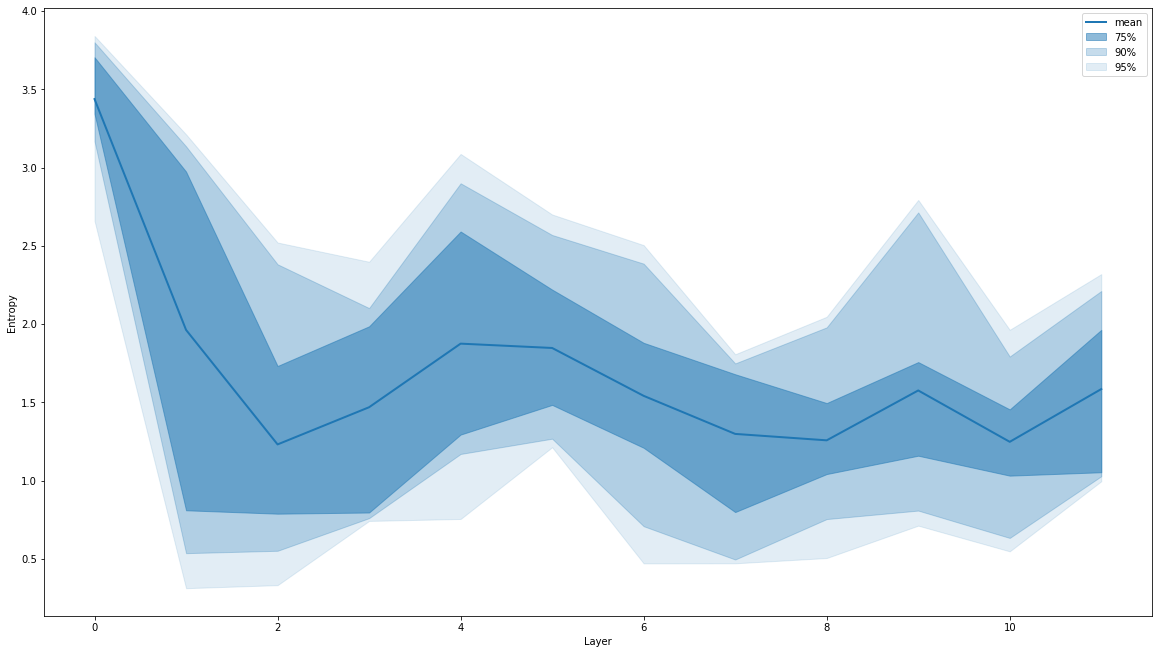

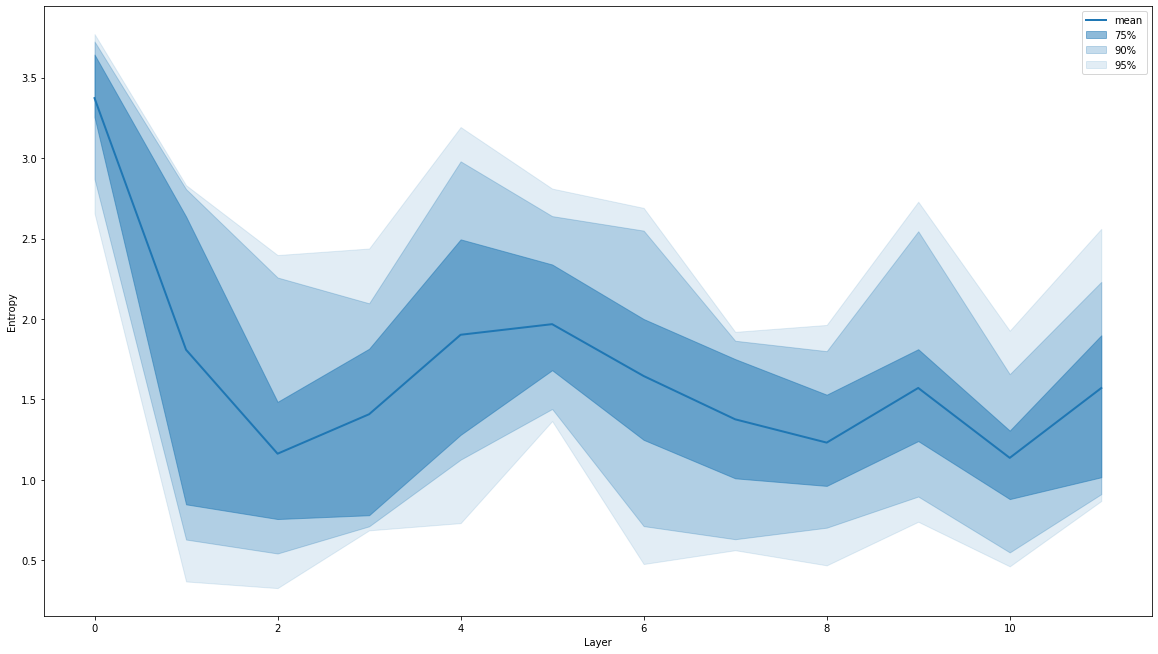

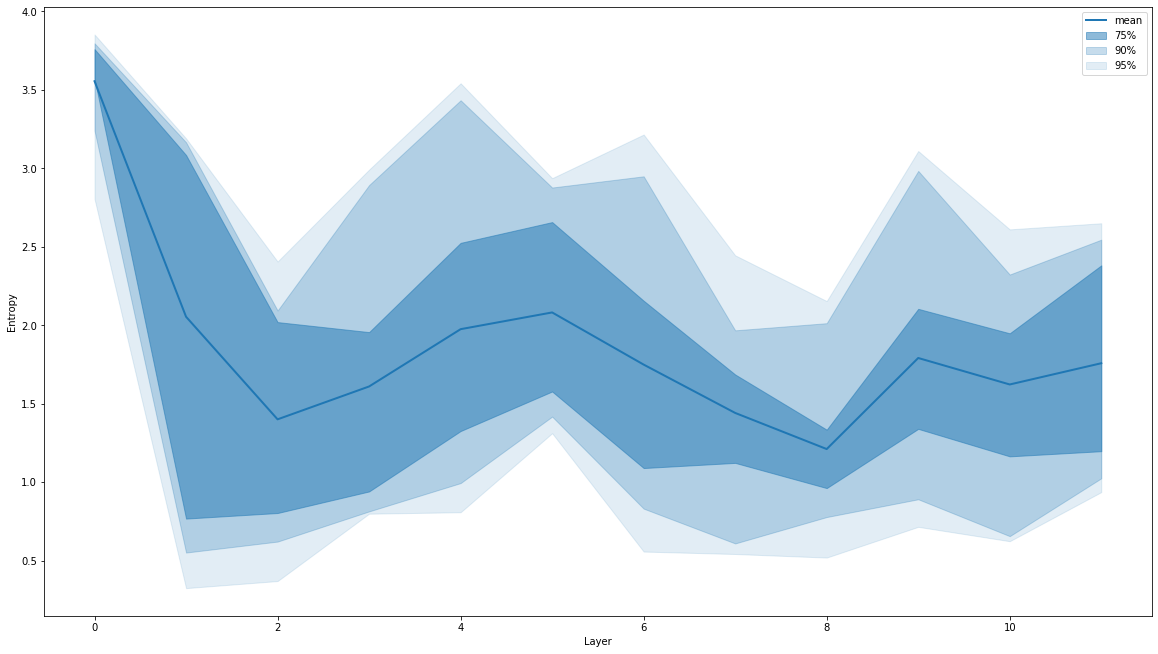

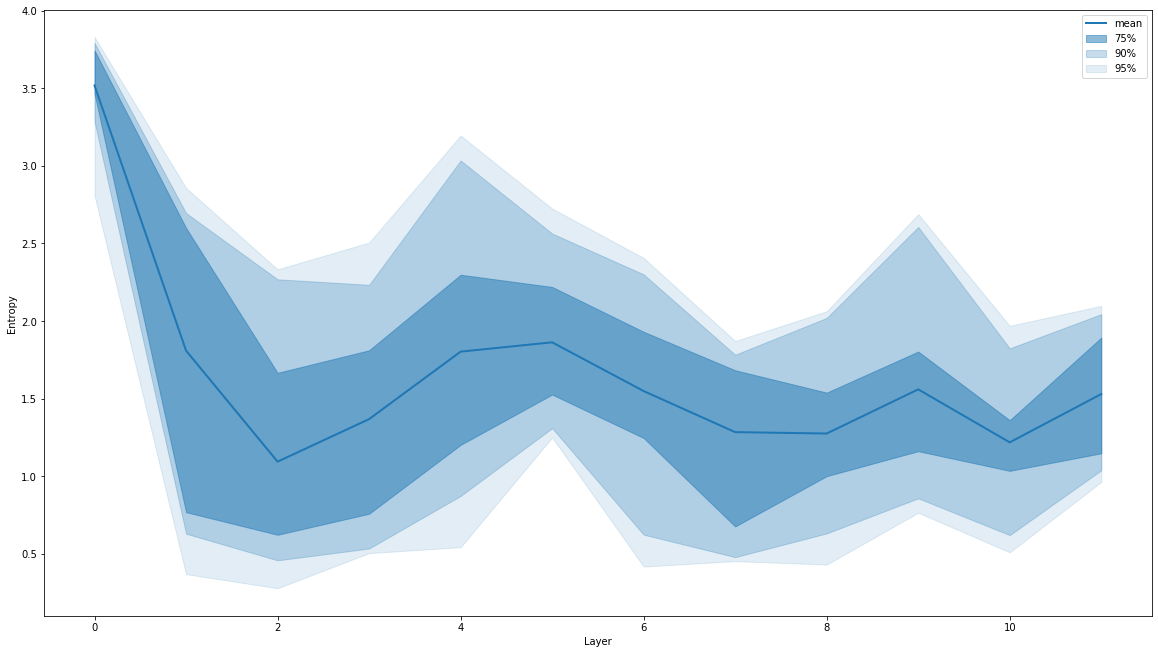

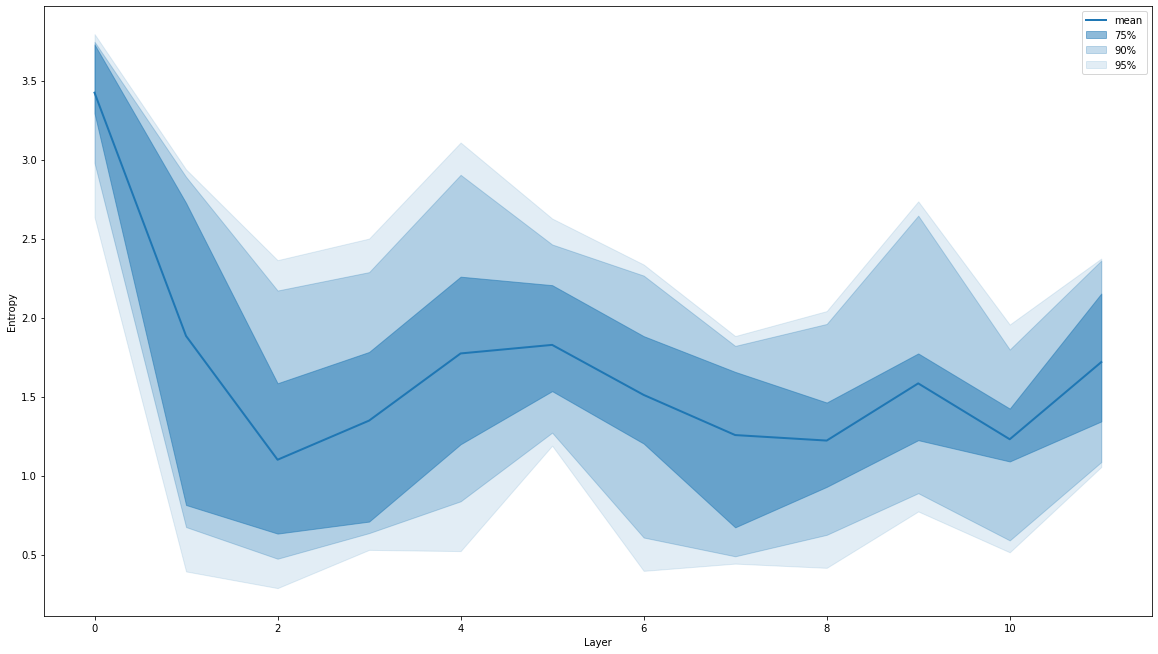

In [49]:
for file_name, language in data_file_names.items():
    
    text = "\n".join(load_data(data_path + file_name + "-ud-test-sent_segmented.txt", sample=1, split_on="\n"))
    
    tokens = tokenizer.encode(text)
    
    att = get_attentions(tokens[:6400], model, seq_length=64, batch_size=64, as_array=True, verbose=False)
    print("For " + language + " language :")
    plot_entropy_distribution_over_layers(att)
    plt.savefig("../viz/entropy/xlm-roberta-base/" + language + ".png")

# Bert-base-multilingual-cased

In [ ]:
tokenizer, model = get_tokenizer_and_model("bert-base-multilingual-cased")

In [ ]:
for file_name, language in data_file_names.items():
    
    text = "\n".join(load_data(data_path + file_name + "-ud-test-sent_segmented.txt", sample=1, split_on="\n"))
    
    tokens = tokenizer.encode(text)
    
    att = get_attentions(tokens[:6400], model, seq_length=64, batch_size=64, as_array=True, verbose=False)
    print("For " + language + " language :")
    plot_entropy_distribution_over_layers(att)
    plt.savefig("../viz/entropy/bert-base-multilingual-cased/" + language + ".png")

# Roberta

In [ ]:
tokenizer, model = get_tokenizer_and_model("roberta-base")

In [ ]:
for file_name, language in data_file_names.items():
    
    text = "\n".join(load_data(data_path + file_name + "-ud-test-sent_segmented.txt", sample=1, split_on="\n"))
    
    tokens = tokenizer.encode(text)
    
    att = get_attentions(tokens[:6400], model, seq_length=64, batch_size=64, as_array=True, verbose=False)
    print("For " + language + " language :")
    plot_entropy_distribution_over_layers(att)
    plt.savefig("../viz/entropy/roberta-base/" + language + ".png")